# Linear Regression Model
<h3><i>The Normal Equation</i></h3>

In [1]:
import numpy as np
np.random.seed(42) # to make this code example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

In [2]:
from sklearn.preprocessing import add_dummy_feature
x_b = add_dummy_feature(X) # add X0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y # the @ operator performs matrics multiplication

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
# making prediction using 𝛉:
X_new  = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add X0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

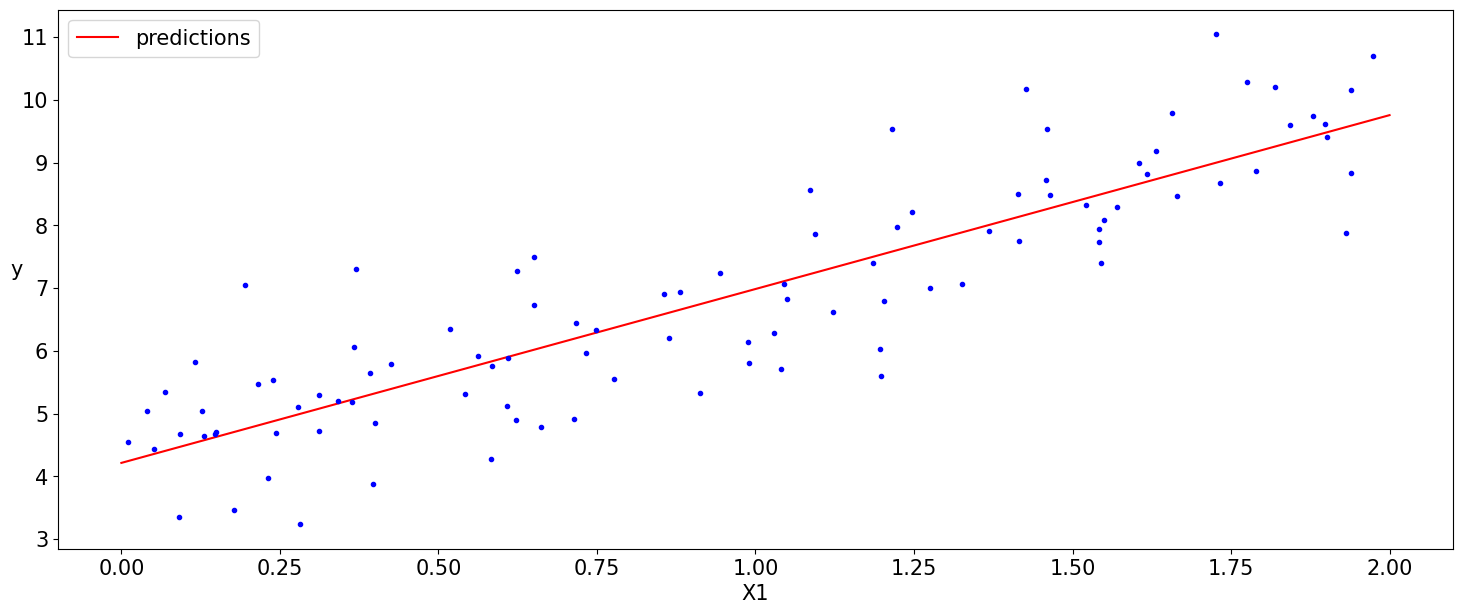

In [5]:
# plotting the model for better visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X,y, "b.")
plt.xlabel("X1", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [6]:
# performing linear regression using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(x_b) @ y

array([[4.21509616],
       [2.77011339]])

# Computational Complexity

<h2>Gradient Descent</h2> - a general optimization algorithm capable of 
    finding optimal solutions to a wide range or problems

<h2>Batch Gradient Descent</h2>

In [10]:
# an implementation of the algorithm
eta =.1 # learning rate
n_epochs = 1000
m = len(x_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m* x_b.T @ (x_b @ theta - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

<h2>Stochastic gradient descent</h2>
using a simple learning schedule

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index : random_index +1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=.01,
                      n_iter_no_change=100, random_state=42) 
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

<h3>Mini-Batch Gradient Descent</h3>

# Polynomial Regression

In [16]:
# quadratic equation
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3 
y = .5 * x ** 2 + x + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [18]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning Curve

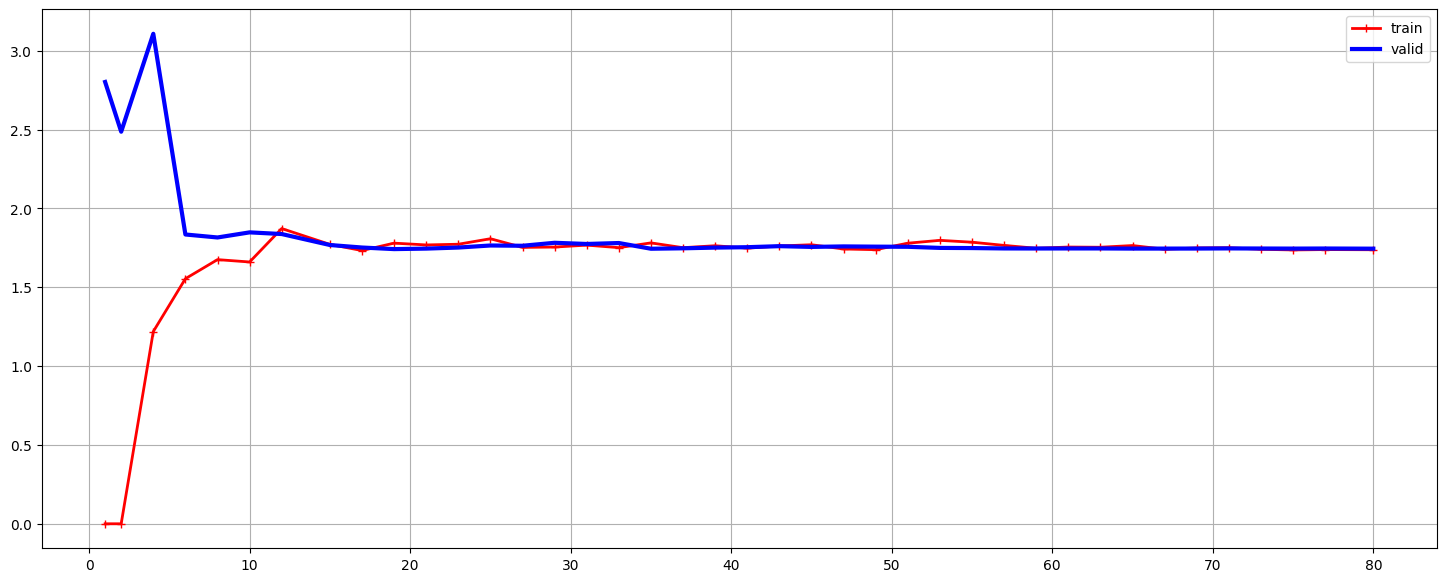

In [23]:
from sklearn.model_selection import learning_curve
plt.figure(figsize=(18, 7))
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label= "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "valid")
plt.grid(True, axis='both')
plt.xlabel("RMSE", fontsize=15)
plt.ylabel("", rotation=0, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.legend()
plt.show()